# 6.2 ESA Task 6.2 Exploring relationships - Norway

## Table of Contents

### 01. Import libraries and datasets

### 02. Verify dataset import results

### 03. Combine dataframe subsets for EDA

### 04. EDA (Exploratory Data Analysis)

>#### 04.01 Correlation matrix heatmaps

>>##### Norway

>#### 04.02 Scatterplots

>>##### Norway

>#### 04.03 Pair Plots

>>##### Norway

>#### 04.04 Categorical Plots

>>##### Norway

>>>##### Scatterplots & stacked bar histograms with categorical exogenous shock variable overlay

### 01. Import libraries and datasets

In [3]:
import pandas as pd
import numpy as np
import os

# Import visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt

In [394]:
# Create string path to main project folder, to use with a Python shortcut for importing files

path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'

# Import first dataset

fx_vix_comm = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'fx_vix_comm_pre_stat.pkl'))

# Import seven (7) country-level subset datasets

ctry_us = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'us_pre_stat.pkl'))
ctry_germany = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'germany_pre_stat.pkl'))
ctry_japan = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'japan_pre_stat.pkl'))
ctry_south_korea = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'south_korea_pre_stat.pkl'))
ctry_australia = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'australia_pre_stat.pkl'))
ctry_norway = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'norway_pre_stat.pkl'))
ctry_switzerland = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'switzerland_pre_stat.pkl'))

### 02. Verify dataset import results

In [14]:
# Check the dimensions
fx_vix_comm.shape

(243, 74)

In [16]:
# Check the last 3 rows
fx_vix_comm.tail(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
240,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,True,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
241,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,True,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
242,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,True,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [46]:
ctry_norway.shape

(243, 31)

In [48]:
ctry_norway.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
3642,Norway,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,0.087412,0.0,-0.0010,0.0038,0.128220,0.023213,0.034977,0.020783,-0.195745,0.008322
3643,Norway,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,0.059788,0.0,-0.0020,0.0018,0.158825,0.034909,0.034977,0.020783,0.082238,0.008322
3644,Norway,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,0.007512,0.0,-0.0016,0.0041,0.140900,0.026053,0.034977,0.020783,-0.051293,0.008322


### 03. Combine dataframe subsets for EDA

#### Norway

In [324]:
# Check for candidate target columns from ctry_norway
ctry_norway.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'cons_prices', 'gdp_pc_usd',
       'real_gdp_chg_pct', 'unemp_rate', 'population', 'fx_to_usd_logret12',
       'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg'],
      dtype='object')

In [582]:
# Select specific columns from each dataframe, to form 2 subset dataframes which will be combined (merged, in this case)
# Select the first-step transformed variables rather than original variables for more meaningful EDA
df1 = ctry_norway[['country', 'timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',\
               'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff', 'stock_index_logret12', 'cons_prices_logret12',\
               'gdp_pc_usd_logret12', 'real_gdp_chg_pct_logret12', 'unemp_rate_logret12', 'population_pct_chg', 'fx_to_usd_logret12']]
df2 = fx_vix_comm[['timestamp', 'vix_avg_logret12', 'brent_avg_logret12', 'nat_gas_eu_avg_logret12']]

In [584]:
df1.shape

(243, 17)

In [586]:
df2.shape

(243, 4)

In [588]:
# Merge df1 and df2 subset dataframes using a left join, which ensures that all rows from df1 are retained
# Note: from prior work creating the parent dataframes, we know that the 'timestamp' values should match precisely, in chronological order
ctry_norway_merge = pd.merge(df1, df2, on='timestamp', how='left')

In [590]:
ctry_norway_merge.shape

(243, 20)

In [592]:
ctry_norway_merge.tail(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,fx_to_usd_logret12,vix_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12
240,Norway,2025-01-01,False,False,False,True,True,0.0,-0.0010,0.0038,0.128220,0.023213,0.034977,0.020783,-0.195745,0.008322,0.087412,0.224487,-0.011698,0.437476
241,Norway,2025-02-01,False,False,False,True,True,0.0,-0.0020,0.0018,0.158825,0.034909,0.034977,0.020783,0.082238,0.008322,0.059788,0.193819,-0.084259,0.637948
242,Norway,2025-03-01,False,False,False,True,True,0.0,-0.0016,0.0041,0.140900,0.026053,0.034977,0.020783,-0.051293,0.008322,0.007512,0.459799,-0.169132,0.433658


In [594]:
ctry_norway_merge.head(15)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,fx_to_usd_logret12,vix_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12
0,Norway,2005-01-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN,NaN,NaN,NaN,NaN
1,Norway,2005-02-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN,NaN,NaN,NaN,NaN
2,Norway,2005-03-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,2005-04-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN,NaN,NaN,NaN,NaN
4,Norway,2005-05-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN,NaN,NaN,NaN,NaN
5,Norway,2005-06-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN,NaN,NaN,NaN,NaN
6,Norway,2005-07-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN,NaN,NaN,NaN,NaN
7,Norway,2005-08-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN,NaN,NaN,NaN,NaN
8,Norway,2005-09-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN,NaN,NaN,NaN,NaN
9,Norway,2005-10-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN,NaN,NaN,NaN,NaN


In [596]:
# As for the United States (above), delete first 12 rows and overwrite the subset merged dataframe
ctry_norway_merge.drop(index=range(12), inplace=True)

In [598]:
ctry_norway_merge.shape

(231, 20)

In [600]:
ctry_norway_merge.head(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,fx_to_usd_logret12,vix_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12
12,Norway,2006-01-01,False,False,False,False,False,0.0053,0.0056,-0.0025,0.444747,0.018304,0.103961,0.024693,-0.068993,0.008085,0.059023,-0.110001,0.359997,0.414646
13,Norway,2006-02-01,False,False,False,False,False,0.0052,0.0065,-0.0005,0.426241,0.025502,0.103961,0.024693,-0.046520,0.008085,0.056374,0.062883,0.285218,0.414646
14,Norway,2006-03-01,False,False,False,False,False,0.0059,0.0070,-0.0018,0.441201,0.022990,0.103961,0.024693,-0.165080,0.008085,0.065444,-0.116166,0.164536,0.414646


In [602]:
# As for the United States (above), reset the index (the argument "drop=True" drops the original index)
ctry_norway_merge.reset_index(drop=True, inplace=True)

In [604]:
ctry_norway_merge.head(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,fx_to_usd_logret12,vix_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12
0,Norway,2006-01-01,False,False,False,False,False,0.0053,0.0056,-0.0025,0.444747,0.018304,0.103961,0.024693,-0.068993,0.008085,0.059023,-0.110001,0.359997,0.414646
1,Norway,2006-02-01,False,False,False,False,False,0.0052,0.0065,-0.0005,0.426241,0.025502,0.103961,0.024693,-0.046520,0.008085,0.056374,0.062883,0.285218,0.414646
2,Norway,2006-03-01,False,False,False,False,False,0.0059,0.0070,-0.0018,0.441201,0.022990,0.103961,0.024693,-0.165080,0.008085,0.065444,-0.116166,0.164536,0.414646


In [606]:
ctry_norway_merge.tail(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,fx_to_usd_logret12,vix_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12
228,Norway,2025-01-01,False,False,False,True,True,0.0,-0.0010,0.0038,0.128220,0.023213,0.034977,0.020783,-0.195745,0.008322,0.087412,0.224487,-0.011698,0.437476
229,Norway,2025-02-01,False,False,False,True,True,0.0,-0.0020,0.0018,0.158825,0.034909,0.034977,0.020783,0.082238,0.008322,0.059788,0.193819,-0.084259,0.637948
230,Norway,2025-03-01,False,False,False,True,True,0.0,-0.0016,0.0041,0.140900,0.026053,0.034977,0.020783,-0.051293,0.008322,0.007512,0.459799,-0.169132,0.433658


In [608]:
# Export the country = Norway subset merged dataframe as backup, before conducting EDA
ctry_norway_merge.to_pickle(os.path.join(path, 'Data','Prepared Data', 'ctry_norway_merge.pkl'))

#### FX, VIX, commodity indices, commodities

In [388]:
fx_vix_comm.columns

Index(['timestamp', 'year', 'month', 'year_month', 'month_text', 'gfc_flag',
       'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',
       'aud_cad', 'aud_jpy', 'chf_aud', 'chf_cad', 'chf_jpy', 'eur_aud',
       'eur_cad', 'eur_chf', 'eur_gbp', 'eur_jpy', 'eur_usd', 'gbp_aud',
       'gbp_cad', 'gbp_jpy', 'gbp_usd', 'usd_aud', 'usd_cad', 'usd_chf',
       'usd_jpy', 'vix_avg', 'all_comm_idx_avg', 'energy_idx_avg', 'wti_avg',
       'brent_avg', 'nat_gas_eu_avg', 'lng_asia_avg', 'metals_idx_avg',
       'iron_ore_avg', 'copper_avg', 'aluminum_avg', 'gold_oz_usd',
       'food_idx_avg', 'aud_cad_logret12', 'aud_jpy_logret12',
       'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',
       'eur_gbp_logret12', 'eur_jpy_logret12', 'eur_usd_logret12',
       'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12',
       'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',
       'usd_c

In [412]:
# No merging needed for this dataframe, instead a subset dataframe is created for EDA
# As for the oecd_ctry subset merged dataframes created above, the first-step transformed variables are selected
fx_vix_comm_sub = fx_vix_comm[['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',\
                              'aud_cad_logret12', 'aud_jpy_logret12', 'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',\
                              'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12', 'eur_gbp_logret12', 'eur_jpy_logret12',\
                              'eur_usd_logret12', 'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12','gbp_usd_logret12',\
                              'usd_aud_logret12', 'usd_cad_logret12', 'usd_chf_logret12', 'usd_jpy_logret12', 'vix_avg_logret12',\
                              'all_comm_idx_avg_logret12', 'energy_idx_avg_logret12', 'wti_avg_logret12', 'brent_avg_logret12',\
                              'nat_gas_eu_avg_logret12', 'lng_asia_avg_logret12', 'metals_idx_avg_logret12', 'iron_ore_avg_logret12',\
                              'copper_avg_logret12', 'aluminum_avg_logret12', 'gold_oz_usd_logret12', 'food_idx_avg_logret12']]

In [414]:
# Check the dimensions
fx_vix_comm_sub.shape

(243, 38)

In [416]:
# Check the last 3 rows
fx_vix_comm_sub.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
240,2025-01-01,False,False,False,True,True,0.011173,0.004112,0.011364,0.012739,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
241,2025-02-01,False,False,False,True,True,0.022473,-0.020073,0.005698,0.025642,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
242,2025-03-01,False,False,False,True,True,0.011173,-0.045619,0.045462,0.069870,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [418]:
# Check the middle columns of the last 3 rows
fx_vix_comm_sub.iloc[240:243, 9:29]

,chf_cad_logret12,chf_jpy_logret12,eur_aud_logret12,eur_cad_logret12,eur_chf_logret12,eur_gbp_logret12,eur_jpy_logret12,eur_usd_logret12,gbp_aud_logret12,gbp_cad_logret12,gbp_jpy_logret12,gbp_usd_logret12,usd_aud_logret12,usd_cad_logret12,usd_chf_logret12,usd_jpy_logret12,vix_avg_logret12,all_comm_idx_avg_logret12,energy_idx_avg_logret12,wti_avg_logret12
240,0.012739,0.010516,0.012121,0.020340,0.000000,-0.023530,0.017037,-0.046957,0.035994,0.040120,0.040320,-0.032003,0.064125,0.071973,0.056512,0.068870,0.224487,0.081167,0.082635,0.021216
241,0.025642,-0.015594,0.000000,0.020340,-0.010582,-0.023811,-0.021275,-0.037740,0.025447,0.051587,0.006908,-0.007968,0.038466,0.057570,0.022473,0.013870,0.193819,0.080687,0.055248,-0.076930
242,0.069870,0.000415,0.035507,0.052993,-0.010363,-0.023530,-0.010866,-0.009217,0.055152,0.072861,0.010141,0.015625,0.038466,0.064539,-0.011300,-0.004817,0.459799,0.025966,-0.040285,-0.174869


In [420]:
# Check the first 15 rows for expected NaNs due to the first-step transformations to an annual cycle conducted in the prior Task 6.1
fx_vix_comm_sub.head(15)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
0,2005-01-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-02-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-03-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-04-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005-05-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2005-06-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2005-07-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2005-08-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2005-09-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2005-10-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [422]:
# As for the OECD country EDA-targeted created dataframes (above), delete first 12 rows and overwrite the subset dataframe
# Need to modify a copy of the subset dataframe to avoid the warning message "A value is trying to be set on a copy of a slice from a Dataframe"
fx_vix_comm_sub_copy = fx_vix_comm_sub.copy()
fx_vix_comm_sub_copy.drop(index=range(12), inplace=True)

In [424]:
# Check the dimensions
fx_vix_comm_sub_copy.shape

(231, 38)

In [426]:
# Check the first 3 rows
fx_vix_comm_sub_copy.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
12,2006-01-01,False,False,False,False,False,-0.066691,0.100485,-0.074108,-0.133531,...,0.335465,0.359997,0.414646,0.232039,0.248924,0.173926,0.403719,0.260799,0.259859,-0.008664
13,2006-02-01,False,False,False,False,False,-0.132060,0.064805,-0.038100,-0.167054,...,0.250573,0.285218,0.414646,0.257307,0.248784,0.173926,0.426659,0.264717,0.270769,-0.020714
14,2006-03-01,False,False,False,False,False,-0.133531,0.032516,-0.028171,-0.155755,...,0.146838,0.164536,0.414646,0.202498,0.225671,0.173926,0.416321,0.202034,0.250028,-0.032650


In [428]:
# As for the OECD countries (above), reset the index (the argument "drop=True" drops the original index)
fx_vix_comm_sub_copy.reset_index(drop=True, inplace=True)

In [430]:
fx_vix_comm_sub_copy.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
0,2006-01-01,False,False,False,False,False,-0.066691,0.100485,-0.074108,-0.133531,...,0.335465,0.359997,0.414646,0.232039,0.248924,0.173926,0.403719,0.260799,0.259859,-0.008664
1,2006-02-01,False,False,False,False,False,-0.132060,0.064805,-0.038100,-0.167054,...,0.250573,0.285218,0.414646,0.257307,0.248784,0.173926,0.426659,0.264717,0.270769,-0.020714
2,2006-03-01,False,False,False,False,False,-0.133531,0.032516,-0.028171,-0.155755,...,0.146838,0.164536,0.414646,0.202498,0.225671,0.173926,0.416321,0.202034,0.250028,-0.032650


In [432]:
fx_vix_comm_sub_copy.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
228,2025-01-01,False,False,False,True,True,0.011173,0.004112,0.011364,0.012739,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
229,2025-02-01,False,False,False,True,True,0.022473,-0.020073,0.005698,0.025642,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
230,2025-03-01,False,False,False,True,True,0.011173,-0.045619,0.045462,0.069870,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [434]:
# Export the subset dataframe as backup, before conducting EDA
# Rename the copy for brevity as 'fx_vix_comm_sub' in a pickle format
fx_vix_comm_sub_copy.to_pickle(os.path.join(path, 'Data','Prepared Data', 'fx_vix_comm_sub.pkl'))

### 04. EDA (Exploratory Data Analysis)

#### 04.01 Correlation matrix heatmaps

#### Norway

In [25]:
# Create a subset dataframe first to include only those variables of interest
sub_norway = ctry_norway_merge[['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff', 'stock_index_logret12', 'cons_prices_logret12',\
                     'gdp_pc_usd_logret12', 'real_gdp_chg_pct_logret12', 'unemp_rate_logret12', 'population_pct_chg', 'vix_avg_logret12',\
                     'fx_to_usd_logret12', 'brent_avg_logret12', 'nat_gas_eu_avg_logret12']]

In [27]:
sub_norway.head(3)

,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,fx_to_usd_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12
0,0.0053,0.0056,-0.0025,0.444747,0.018304,0.103961,0.024693,-0.068993,0.008085,-0.110001,0.059023,0.359997,0.414646
1,0.0052,0.0065,-0.0005,0.426241,0.025502,0.103961,0.024693,-0.046520,0.008085,0.062883,0.056374,0.285218,0.414646
2,0.0059,0.0070,-0.0018,0.441201,0.022990,0.103961,0.024693,-0.165080,0.008085,-0.116166,0.065444,0.164536,0.414646


In [614]:
sub_norway.tail(3)

,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,fx_to_usd_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12
228,0.0,-0.0010,0.0038,0.128220,0.023213,0.034977,0.020783,-0.195745,0.008322,0.224487,0.087412,-0.011698,0.437476
229,0.0,-0.0020,0.0018,0.158825,0.034909,0.034977,0.020783,0.082238,0.008322,0.193819,0.059788,-0.084259,0.637948
230,0.0,-0.0016,0.0041,0.140900,0.026053,0.034977,0.020783,-0.051293,0.008322,0.459799,0.007512,-0.169132,0.433658


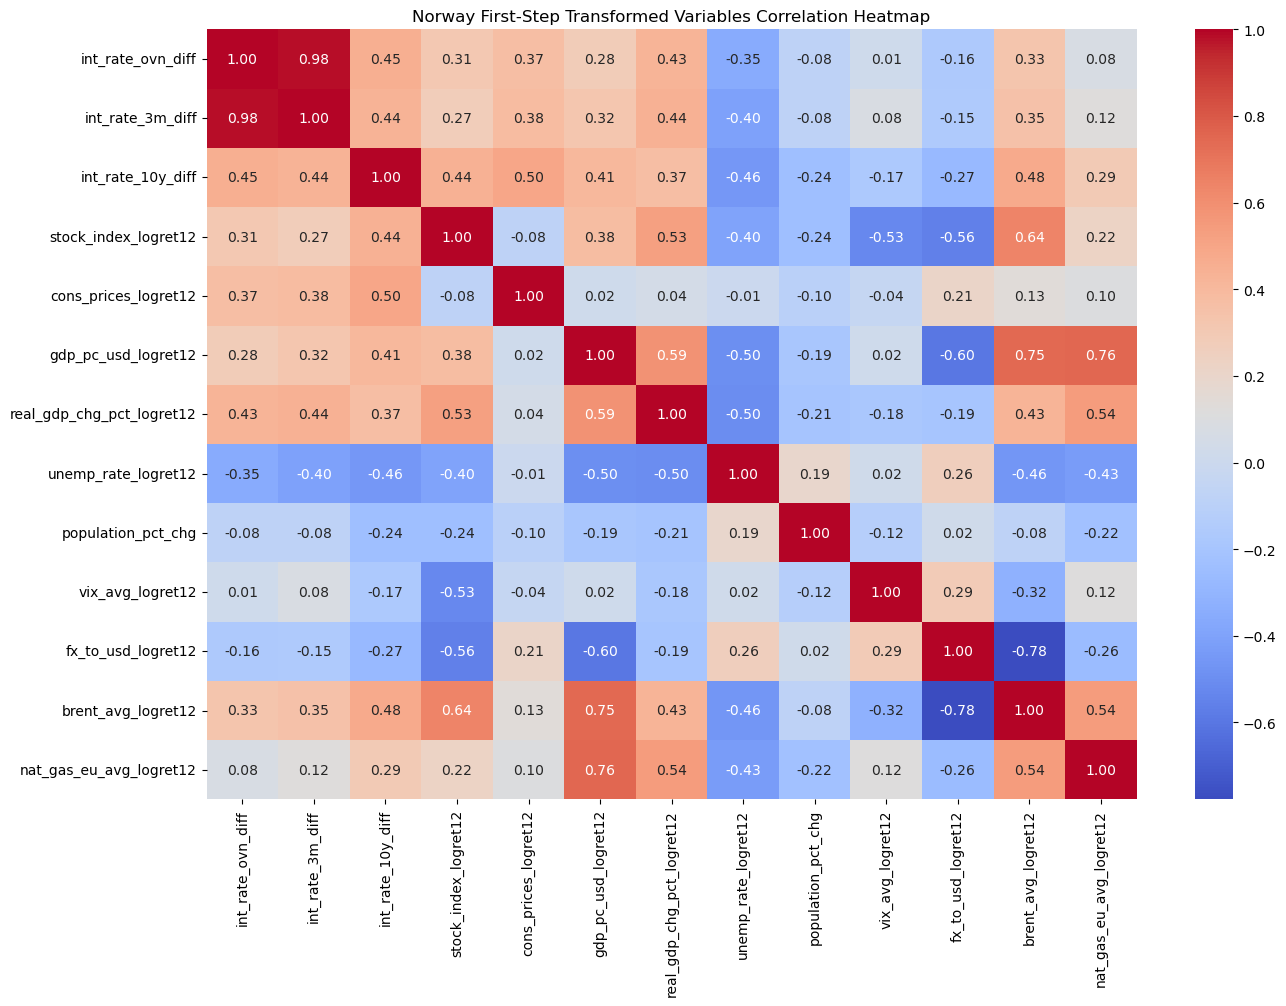

In [616]:
# Generate a correlation matrix heatmap for the first-step transformed variables in the sub_norway dataframe

plt.figure(figsize=(15, 10))
sns.heatmap(sub_norway.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Norway First-Step Transformed Variables Correlation Heatmap")
plt.show()

##### This correlation heatmap examines variables before necessary stationarization and z-score standardization (normalization, rescaling), which will come later.  Accordingly, there will likely be some spurious correlations within the matrix at this EDA stage.  The correlations measured are between mostly log return (12 months) first-step transformed variables, and to a lesser extent with a few first difference of % variables.

#### Preliminary Interpretation

##### This will merely highlight divergences with the US correlation heatmap results or interesting relationships.

##### Interest rate variables (overnight, 10-year) had moderate positive correlations (+0.31-0.44)) with the primary stock market, and moderate-strong negative correlations (-0.41 to -0.56) with the unemployment rate.  All three (3) interest rate variables had moderate positive correlations with inflation (+0.37-0.50) and separately, with both GDP measures (+0.28-0.44).  Meanwhile, moderate negative correlations (-0.35-0.46) with the unemployment rate, but moderate positive correlations (+0.33-0.48) with Brent crude oil log return of annual price changes.

##### Brent crude oil and natural gas price movements are included in the Norway subset dataframe because Norway's economy is heavily tied to monetization of its oil and natural gas production.

##### The primary stock market index log returns had moderate-strong positive correlations (+0.38-0.53) with GDP measures, moderate negative correlation (-0.40) with the unemployment rate and moderate-strong negative correlation (-0.53) with the VIX, as many other stock index returns of other countries sampled here have shown.  Meanwhile, the stock market had a moderate-strong negative correlation (-0.56) with 'fx_to_usd', which in this dataframe is the variable for USDNOK (Norwegian Krone amount per 1 USD) log returns (annual).  This relationship, suggesting that Norway's stock market likes a strong NOK, at least relative to the USD, is counterintuitive. Norway exports a lot more than it imports, as relative %'s of its GDP, thus it presumably benefits more if its local currency does not climb against any base currencies in which particular commodities are transacted. Finally, on the commodities front, while the stock market's strong positive correlation (+0.64) with Brent crude oil price changes was not suprising, the low correlation (a mere +0.22) with 'nat_gas_eu_avg_logret12' (natural gas price changes, in Europe) was entirely unexpected.  Natural gas generates more export revenues than Brent crude oil for Norway, a fact the local stock market apparently ignores.  The gnomes may have something to do with that.

##### Both measures of GDP registered moderate-strong negative correlations (-0.50) with the unemployment rate.

##### GDP per capita in USD revealed a moderate-strong negative correlation (-0.60) with 'fx_to_usd' (USDNOK, e.g. Norwegian Krone amount per 1 USD), a normal relationship for those variables generally speaking.  Meanwhile, it had strong positive correlations with Brent crude oil (+0.75) and natural gas (+0.76) price log returns (annual) in the European arena.  Real GDP log return changes (annual) had more moderate positive correlations (+0.43-0.54) with oil and natural gas, comparatively speaking.

##### Unemployment rate had moderate negative correlations (-0.43-0.46) with the Brent crude oil and natural gas transformed variables, as one would expect.

##### USDNOK ('fx_to_usd') revealed a strong negative correlation (-0.78) with the Brent crude oil pricing variable, but a low negative correlation (a mere -0.26) with the natural gas pricing variable.  The latter, odd "disconnect" might be explained by the observation that Norway exports natural gas to continental Europe and the United Kingdom, and is likely paid in EUR and GBP rather than in USD, for that commodity.

### 04.02 Scatterplots

### Comment: All scatterplots here are of first-step transformed variables as log returns (annual) or first difference %'s. For brevity the short form of the variable name is used in plot labels and descriptive commentary.

### Note: Both versions of the GDP measure change data values annually rather than monthly, while all other variables (except population) change data values monthly, thus the scatterplots that include either GDP measure will have straight lines of dots representing this difference in measurement periodicity.

#### Norway

In [794]:
# Check variables for candidate scatterplots based on the prior correlation heatmap results
sub_norway.columns

Index(['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg', 'vix_avg_logret12', 'fx_to_usd_logret12',
       'brent_avg_logret12', 'nat_gas_eu_avg_logret12'],
      dtype='object')

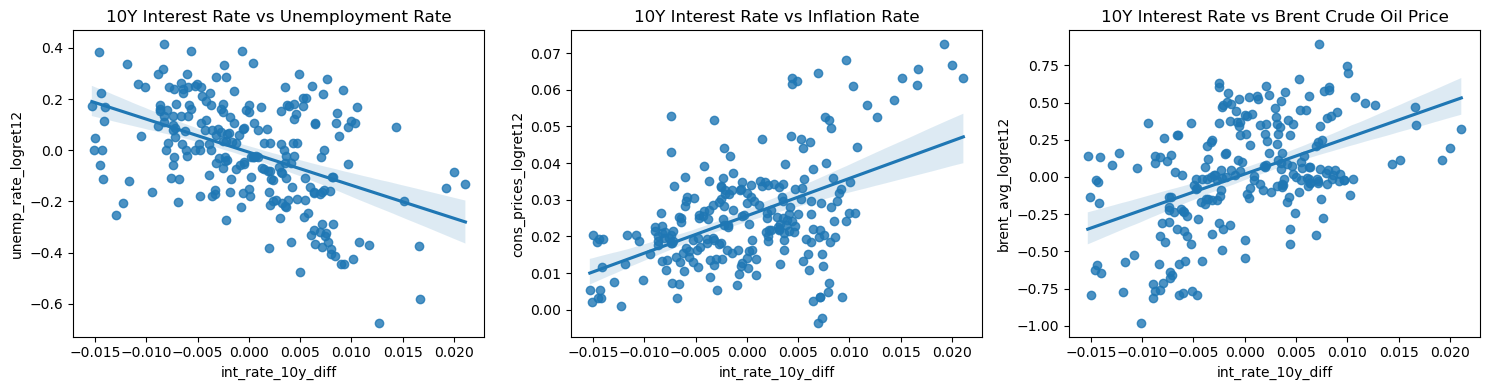

In [796]:
# Scatterplots for more combinations of variables
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.regplot(x='int_rate_10y_diff', y='unemp_rate_logret12', data=sub_norway, ax=axes[0])
axes[0].set_title('10Y Interest Rate vs Unemployment Rate')
sns.regplot(x='int_rate_10y_diff', y='cons_prices_logret12', data=sub_norway, ax=axes[1])
axes[1].set_title('10Y Interest Rate vs Inflation Rate')
sns.regplot(x='int_rate_10y_diff', y='brent_avg_logret12', data=sub_norway, ax=axes[2])
axes[2].set_title('10Y Interest Rate vs Brent Crude Oil Price')
plt.tight_layout()
plt.show()

### When the 10-year interest rate climbs in Norway (central banks use interest rates to moderate inflation and an overheated economy), unemployment falls.  In the middle plot, it's evident that higher inflation is associated with a higher interest rate. This is supported in the right-hand plot, where higher Brent Crude Oil pricing (a component of inflation), which helps Norway grow its GDP faster, will go hand-in-hand with a higher local interest rate environment, generally speaking.

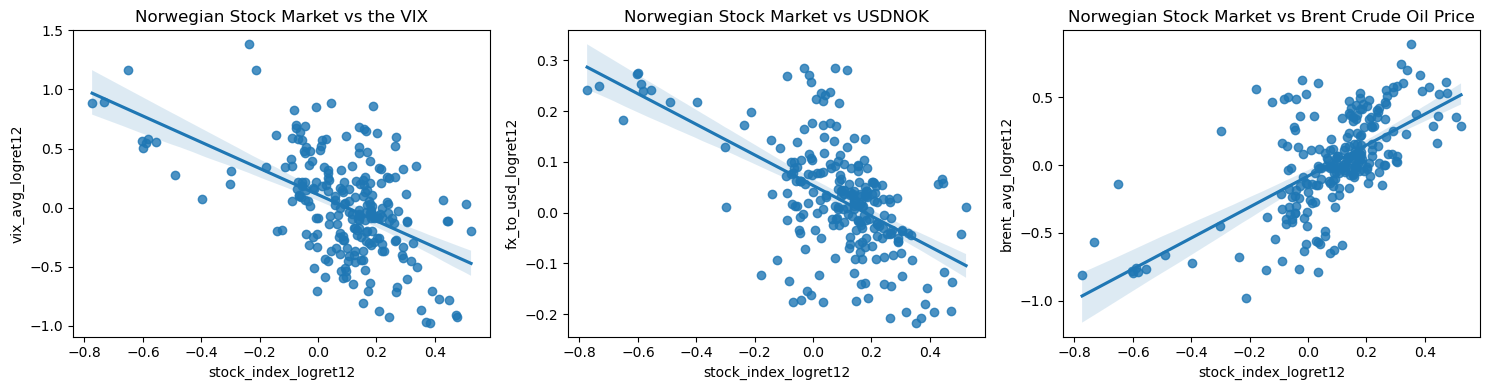

In [800]:
# Scatterplots of stock market index against other variables
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.regplot(x='stock_index_logret12', y='vix_avg_logret12', data=sub_norway, ax=axes[0])
axes[0].set_title('Norwegian Stock Market vs the VIX')
sns.regplot(x='stock_index_logret12', y='fx_to_usd_logret12', data=sub_norway, ax=axes[1])
axes[1].set_title('Norwegian Stock Market vs USDNOK')
sns.regplot(x='stock_index_logret12', y='brent_avg_logret12', data=sub_norway, ax=axes[2])
axes[2].set_title('Norwegian Stock Market vs Brent Crude Oil Price')
plt.tight_layout()
plt.show()

### Similar to many other stock market indices, the Norwegian stock market has a negative (inverse) correlation with the VIX (left-side plot).  It has a negative correlation with USDNOK (Norwegian Krone amount per 1 USD), confirming that the local stock market prefers a strong NOK, at least against USD (middle plot).  The right_side plot reminds us that Norway's economy, and by extension its stock market, is firmly tied to one of its major commodity exports, Brent crude oil, besides natural gas. Norway's stock market, incidentally, has experienced the highest secular (20-year) growth trajectory of the seven (7) OECD countries evaluated here.  That fact receives very little international press.  The gnomes strike again, perhaps due to their penchant for anonymity.

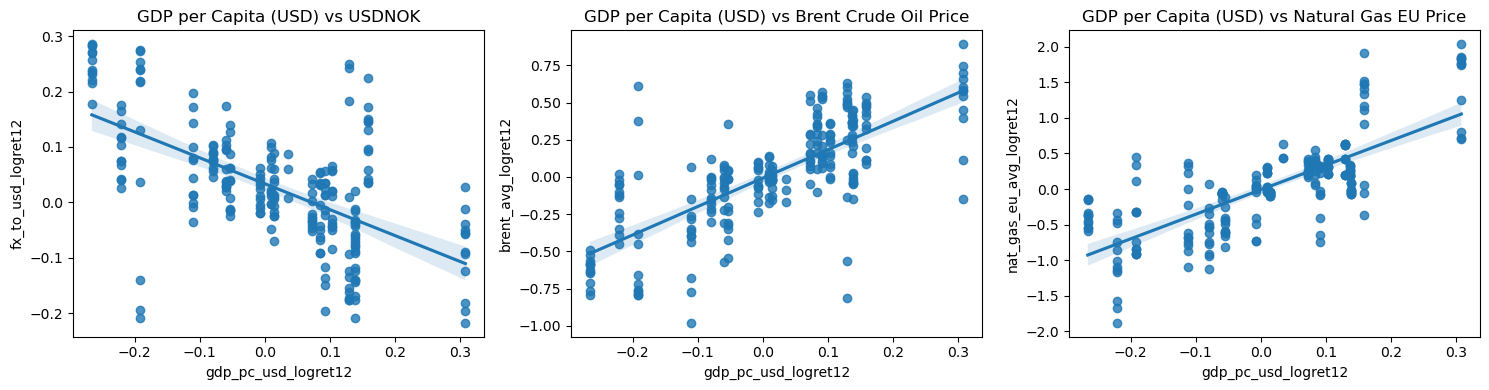

In [805]:
# Three more scatterplots, to look at population-normalized GDP correlation relationships
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.regplot(x='gdp_pc_usd_logret12', y='fx_to_usd_logret12', data=sub_norway, ax=axes[0])
axes[0].set_title('GDP per Capita (USD) vs USDNOK')
sns.regplot(x='gdp_pc_usd_logret12', y='brent_avg_logret12', data=sub_norway, ax=axes[1])
axes[1].set_title('GDP per Capita (USD) vs Brent Crude Oil Price')
sns.regplot(x='gdp_pc_usd_logret12', y='nat_gas_eu_avg_logret12', data=sub_norway, ax=axes[2])
axes[2].set_title('GDP per Capita (USD) vs Natural Gas EU Price')
plt.tight_layout()
plt.show()

### Population-normalized GDP (expressed in USD) rises with NOK appreciation (or vice versa) against the USD (left-hand plot), and with higher Brent crude oil and natural gas (EU) prices (middle and left-hand plots, respectively).

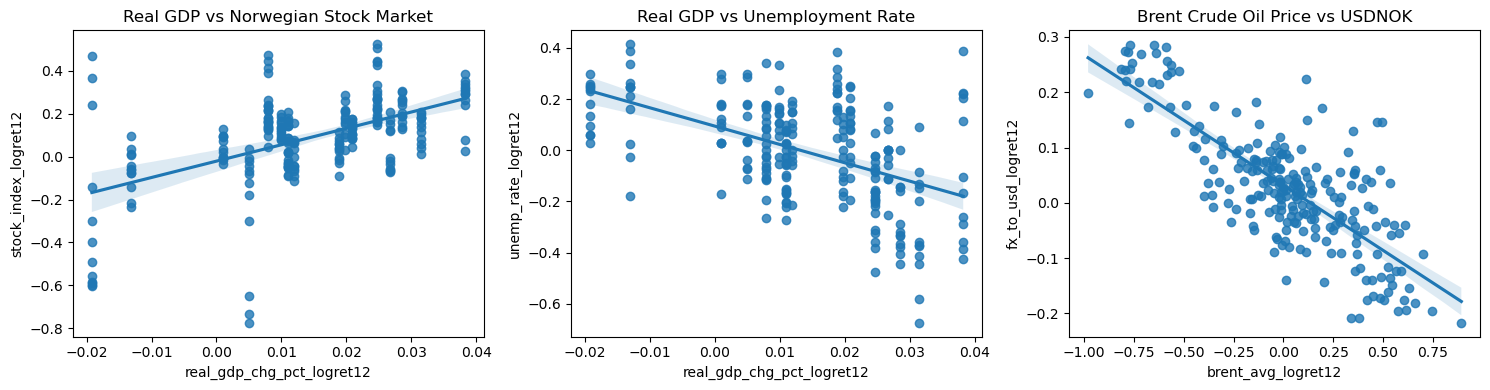

In [808]:
# Three more scatterplots, to look at more correlation relationships
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.regplot(x='real_gdp_chg_pct_logret12', y='stock_index_logret12', data=sub_norway, ax=axes[0])
axes[0].set_title('Real GDP vs Norwegian Stock Market')
sns.regplot(x='real_gdp_chg_pct_logret12', y='unemp_rate_logret12', data=sub_norway, ax=axes[1])
axes[1].set_title('Real GDP vs Unemployment Rate')
sns.regplot(x='brent_avg_logret12', y='fx_to_usd_logret12', data=sub_norway, ax=axes[2])
axes[2].set_title('Brent Crude Oil Price vs USDNOK')
plt.tight_layout()
plt.show()

### Higher real GDP is associated with local stock market appreciation (left-hand plot) and a lower unemployment rate (middle plot).  The right-hand plot shows a strong and steep-angled negative correlation between Brent oil price and USDNOK, e.g. higher oil prices help NOK appreciate strongly against the USD for Norway's oil-exporting economy.

### 04.03 Pair Plots

#### Norway

In [37]:
# Check variables for candidate pair plots based on prior scatterplots
sub_norway.columns

Index(['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg', 'vix_avg_logret12', 'fx_to_usd_logret12',
       'brent_avg_logret12', 'nat_gas_eu_avg_logret12'],
      dtype='object')

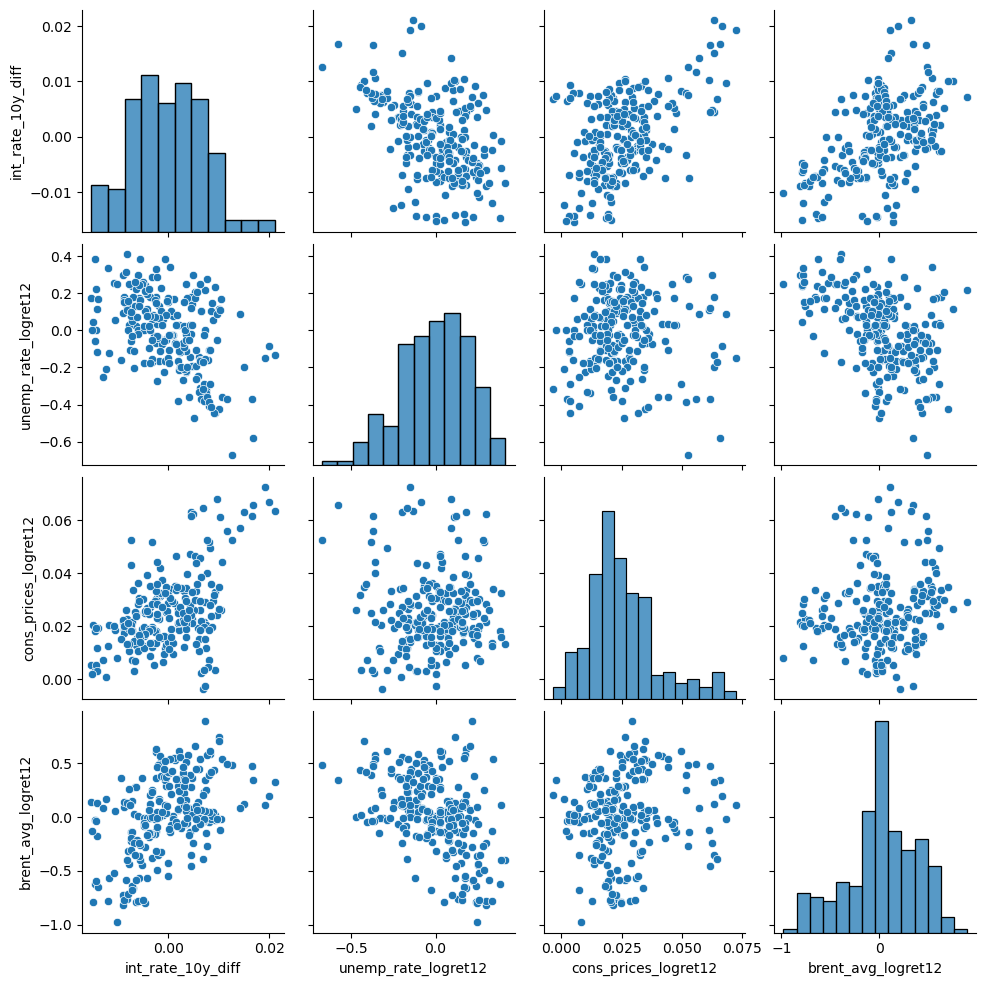

In [39]:
# Create a pair plot matrix
sub_norway_1 = sub_norway[['int_rate_10y_diff', 'unemp_rate_logret12', 'cons_prices_logret12', 'brent_avg_logret12']]
p_norway_1 = sns.pairplot(sub_norway_1)

#### The variables have approximate Normal frequency distributions, with minor skew (right for 'cons_prices', left for 'unemp_rate' and 'brent_avg'). Further exploration: (1) 10-year interest rate vs unemployment rate, to assess whether long-term interest rate increases occur when the unemployment rate is increasing or decreasing, with the scatterplot suggesting the latter dynamic (e.g. negative correlation); (2) 10-year interest rate vs inflation, as Norges Bank policy uses interest rates to mitigate inflation, and the scatterplot shows a clear positive correlation between the two variables; and (3) 10-year interest rate vs Brent crude oil price, to determine whether the assumption that higher oil prices contribute to inflation, which is typically countered by central banks raising interest rates, is correct, and the scatterplot supports that by showing a generally positive correlation between the two variables.

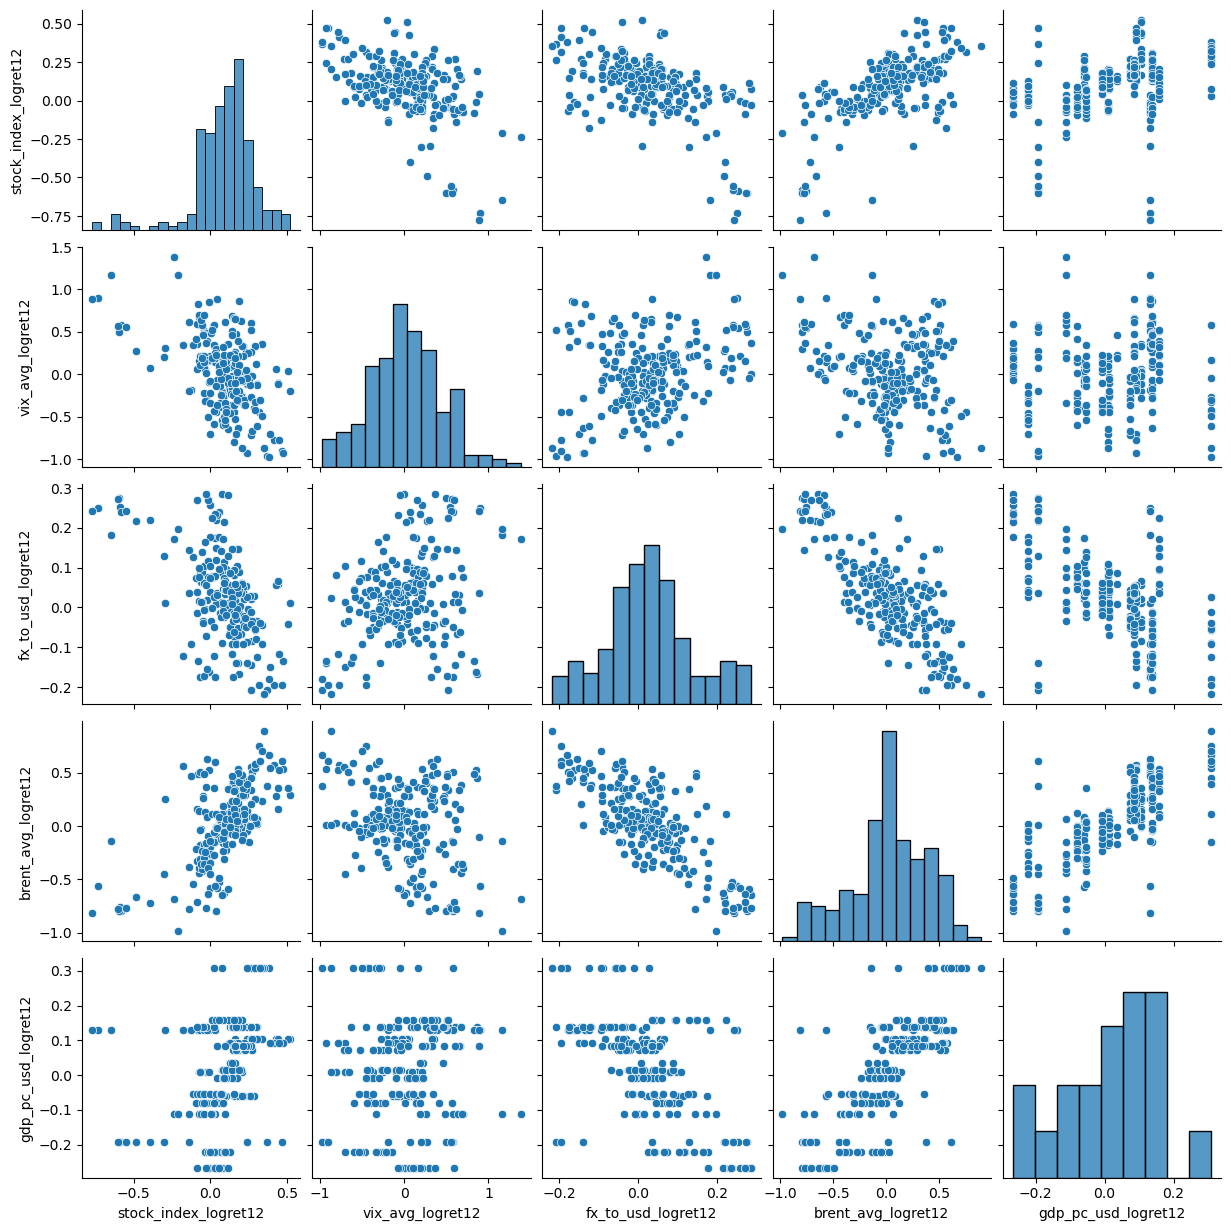

In [41]:
# Create another pair plot matrix
sub_norway_2 = sub_norway[['stock_index_logret12', 'vix_avg_logret12', 'fx_to_usd_logret12', 'brent_avg_logret12', 'gdp_pc_usd_logret12']]
p_norway_2 = sns.pairplot(sub_norway_2)

#### The 'gdp_pc_usd' variable has a non-Normal frequency distribution, 'stock_index' and 'brent_avg' have left skew, while 'vix_avg' and 'fx_to_usd' approximate a Normal distribution. Further exploration: (1) stock market vs VIX, to see how a US equities market fear gauge (the VIX) impacts a non-US stock market (Norway, in this case), and because the scatterplot suggests an inverse (negative) correlation as per the US experience; (2) stock market vs 'fx_to_usd' which is USDNOK (Norwegian Krone amount per 1 USD), to learn that the relationship (a negative correlation as per the scatterplot) resembles the South Korean rather than Japanese experience, e.g. the Norwegian stock market "likes" a strong local currency vs the USD; (3) stock market vs Brent crude oil price, because this commodity is a major export of Norway's (after natural gas), and the scatterplot confirms a positive correlation between the two variables; (4) Brent crude oil price vs 'fx_to_usd' (USDNOK) to assess sensitivity of Norway's FX cross-rate with the USD to the price of oil, where as expected the scatterplot shows a negative correlation (NOK appreciates against the USD when crude oil price goes higher); and (5) GDP per Capita vs Brent crude oil price, to confirm an expected positive correlation between those two variables, which the scatterplot does generally support despite some large variance fluctuations.

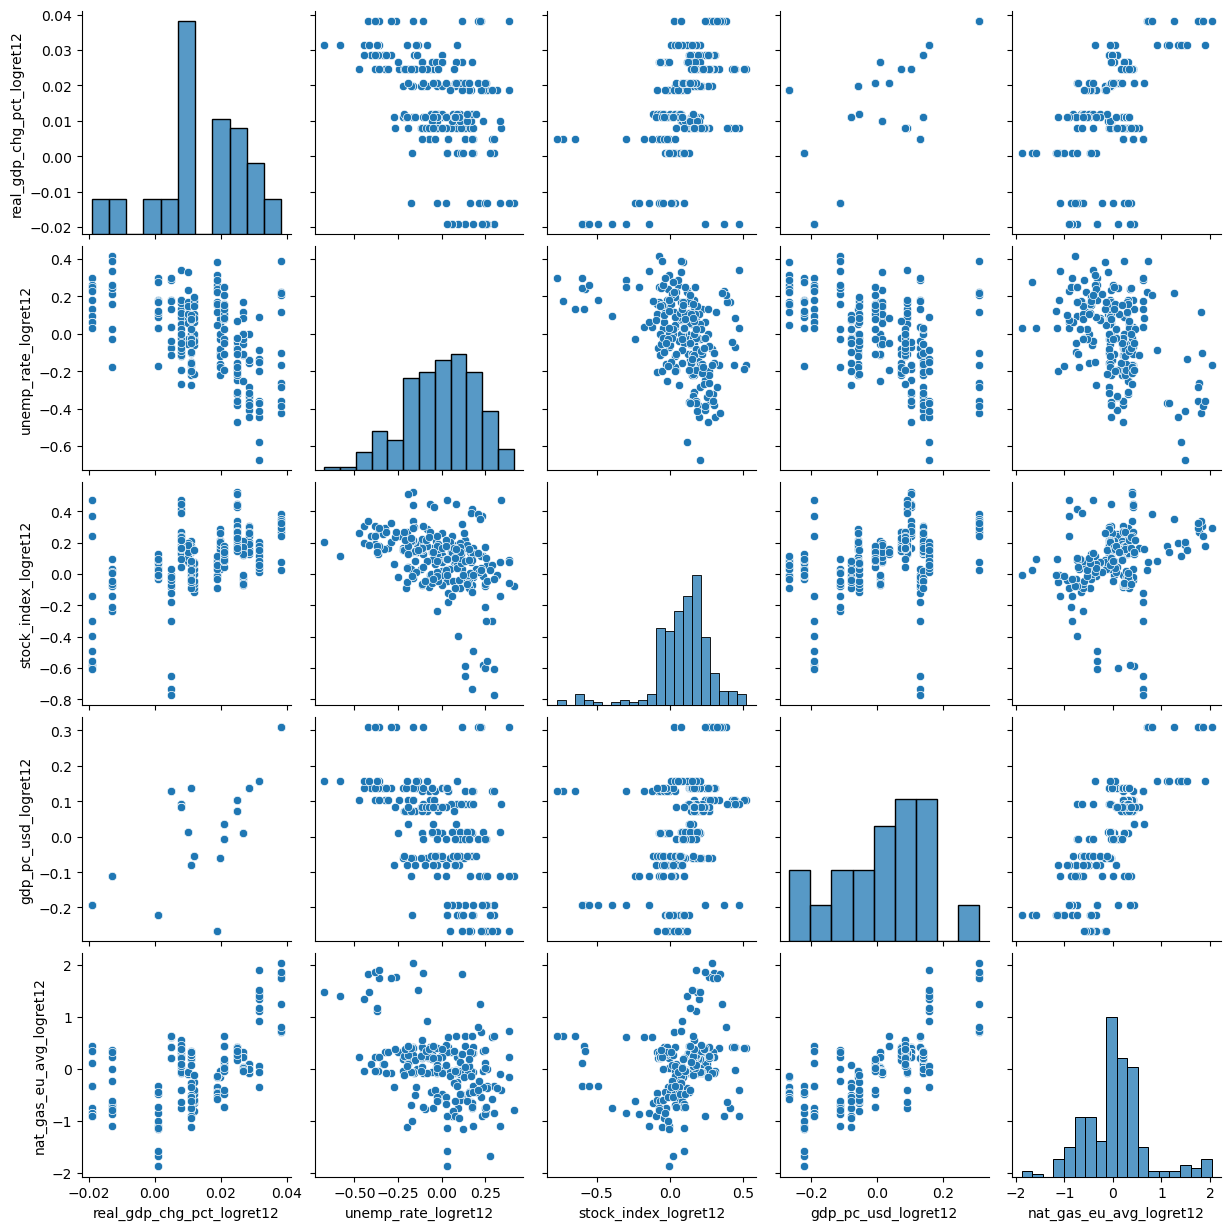

In [43]:
# Create another pair plot matrix
sub_norway_3 = sub_norway[['real_gdp_chg_pct_logret12', 'unemp_rate_logret12', 'stock_index_logret12', 'gdp_pc_usd_logret12',\
                           'nat_gas_eu_avg_logret12']]
p_norway_3 = sns.pairplot(sub_norway_3)

#### The 'gdp_pc_usd' variable has a non-Normal frequency distribution, 'stock_index', 'real_gdp_chg_pct' and 'unemp_rate' have left skew, and 'nat_gas_eu_avg' has right skew. Further exploration: (1) Real GDP vs unemployment rate, as these are major economic variables, with the scatterplot showing the expected negative correlation; (2) Real GDP vs stock market, as these are major macroeconomic variables and the scatterplot shows the expected positive correlation despite some outliers; and (3) GDP per Capita vs natural gas EU price, because natural gas is Norway's largest export (crude oil is 2nd), and the scatterplot shows a clear positive correlation between the two variables, as expected.

### 04.04 Categorical Plots

#### Disclosure: I engaged ChatGPT to create and name two custom-defined functions below -- namely, shockstack_grid and shockstack_kdegrid_v2 -- for some of the plot matrices in this section. This helped expedite further visualization of dozens of variables, conserve space and time, optimize formatting and legends and right-size grids with varying quantities of sub-plots.

#### The subset dataframes created for EDA correlation heatmaps and pair plots omitted the time variable but were all organized exactly the same way chronologically (and the year 2005 row data was omitted as all the first-step transformed variables as annual log returns, etc. had NaN values that year because monthly data began with Jan 2005), and consisted entirely of numerical variables (no categorical variables). Since these next visualizations target the addition of a categorical dimension, it makes sense now to add a column to the subset dataframes of interest that specifies which -- if any -- exogenous economic shock or shocks existed for the data values in each row (where each row corresponds to a month/year point in time). During normal times, when there were no shock(s) occurring, the categorical data value "No Shock" will be applied.  The goal of the categorical plots is to visually zero in on outlier x,y data points in the scatterplots to see which shock(s), if any, caused some or most of the extreme fluctuations.

#### First it's helpful to create an exogenous economic shock-specific subset dataframe, with a derived column 'shock_name' to name the shock(s) if any that existed at each point in time.

#### Begin by examining the fx_vix_comm_sub_copy subset dataframe on dimensions, content and column names, from which we will extract the shock-related columns to create another subset dataframe.

In [987]:
fx_vix_comm_sub_copy.shape

(231, 38)

In [991]:
fx_vix_comm_sub_copy.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
0,2006-01-01,False,False,False,False,False,-0.066691,0.100485,-0.074108,-0.133531,...,0.335465,0.359997,0.414646,0.232039,0.248924,0.173926,0.403719,0.260799,0.259859,-0.008664
1,2006-02-01,False,False,False,False,False,-0.132060,0.064805,-0.038100,-0.167054,...,0.250573,0.285218,0.414646,0.257307,0.248784,0.173926,0.426659,0.264717,0.270769,-0.020714
2,2006-03-01,False,False,False,False,False,-0.133531,0.032516,-0.028171,-0.155755,...,0.146838,0.164536,0.414646,0.202498,0.225671,0.173926,0.416321,0.202034,0.250028,-0.032650


In [993]:
fx_vix_comm_sub_copy.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
228,2025-01-01,False,False,False,True,True,0.011173,0.004112,0.011364,0.012739,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
229,2025-02-01,False,False,False,True,True,0.022473,-0.020073,0.005698,0.025642,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
230,2025-03-01,False,False,False,True,True,0.011173,-0.045619,0.045462,0.069870,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [995]:
fx_vix_comm_sub_copy.columns

Index(['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'aud_cad_logret12', 'aud_jpy_logret12',
       'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',
       'eur_gbp_logret12', 'eur_jpy_logret12', 'eur_usd_logret12',
       'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12',
       'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',
       'usd_chf_logret12', 'usd_jpy_logret12', 'vix_avg_logret12',
       'all_comm_idx_avg_logret12', 'energy_idx_avg_logret12',
       'wti_avg_logret12', 'brent_avg_logret12', 'nat_gas_eu_avg_logret12',
       'lng_asia_avg_logret12', 'metals_idx_avg_logret12',
       'iron_ore_avg_logret12', 'copper_avg_logret12', 'aluminum_avg_logret12',
       'gold_oz_usd_logret12', 'food_idx_avg_logret12'],
      dtype='object')

#### Create an exogenous economic shocks-specific subset dataframe, and then verify dimensions and content

In [1013]:
exo_shk_flags = fx_vix_comm_sub_copy[['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag']]

In [1015]:
exo_shk_flags.shape

(231, 6)

In [1017]:
exo_shk_flags.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag
0,2006-01-01,False,False,False,False,False
1,2006-02-01,False,False,False,False,False
2,2006-03-01,False,False,False,False,False


In [1019]:
exo_shk_flags.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag
228,2025-01-01,False,False,False,True,True
229,2025-02-01,False,False,False,True,True
230,2025-03-01,False,False,False,True,True


#### Create and add a derived column 'shock_name' and applicable shock name categorical data values to the subset dataframe

In [1021]:
exo_shk_flags_copy = exo_shk_flags.copy()

In [1025]:
exo_shk_flags_copy.loc[exo_shk_flags_copy['gfc_flag'] == True, 'shock_name'] = 'GFC'

In [1031]:
exo_shk_flags_copy.loc[exo_shk_flags_copy['cpc_flag'] == True, 'shock_name'] = 'CPC'

In [1033]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['cov_19_flag'] == True) & (exo_shk_flags_copy['rus_ukr_war_flag'] == False), 'shock_name'] = 'Cov-19'

In [1035]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['cov_19_flag'] == True) & \
                       (exo_shk_flags_copy['rus_ukr_war_flag'] == True), 'shock_name'] = 'Cov-19 & Rus_Ukr_War'

In [1037]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['cov_19_flag'] == False) & (exo_shk_flags_copy['rus_ukr_war_flag'] == True) & \
                  (exo_shk_flags_copy['boj_int_rate_flag'] == False), 'shock_name'] = 'Rus_Ukr_War'

In [1039]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['cov_19_flag'] == False) & (exo_shk_flags_copy['rus_ukr_war_flag'] == True) & \
                  (exo_shk_flags_copy['boj_int_rate_flag'] == True), 'shock_name'] = 'Rus_Ukr_War & BOJ Pivot'

In [1045]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['gfc_flag'] == False) & (exo_shk_flags_copy['cpc_flag'] == False) & \
                       (exo_shk_flags_copy['cov_19_flag'] == False) & (exo_shk_flags_copy['rus_ukr_war_flag'] == False) & \
                       (exo_shk_flags_copy['boj_int_rate_flag'] == False), 'shock_name'] = 'No Shock'

#### Check the modified dataframe dimensions and content to verify that the 'shock_name' column derivation took place as intended

In [1047]:
exo_shk_flags_copy.shape

(231, 7)

In [1049]:
exo_shk_flags_copy['shock_name'].value_counts(dropna = False)

shock_name
No Shock                   132
GFC                         29
Cov-19                      23
Cov-19 & Rus_Ukr_War        16
Rus_Ukr_War & BOJ Pivot     13
CPC                          9
Rus_Ukr_War                  9
Name: count, dtype: int64

### Interesting result. The counts above (which count the number of months, since the data are monthly) tell us: normal economic conditions ("No Shock" periods) comprised only 57% (132/231) of the 19-year plus 3-month temporal range.  Conversely, shocks big (Great Financial Crisis, Covid-19) and small (2014 Commodity Price Collapse, still-ongoing Russia-Ukraine War and the still-ongoing 2024 Bank of Japan Interest Rate Pivot) in total comprised 43% of that temporal range.  We lurch from crisis to crisis, shock to shock.  Hence, this independent study project has the goal of understanding different types of past or current exogenous economic shocks' impact on some countries and asset classes, to help model potential outcomes for these variables based on the new shock that rolled out in April 2025, e.g. US tariff policy changes.

In [1051]:
exo_shk_flags_copy.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,shock_name
0,2006-01-01,False,False,False,False,False,No Shock
1,2006-02-01,False,False,False,False,False,No Shock
2,2006-03-01,False,False,False,False,False,No Shock


In [1053]:
exo_shk_flags_copy.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,shock_name
228,2025-01-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot
229,2025-02-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot
230,2025-03-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot


In [1055]:
# Export the exogenous shock-specific subset dataframe as backup, as it may prove useful later
exo_shk_flags_copy.to_pickle(os.path.join(path, 'Data','Prepared Data', 'exo_shk_flags_copy.pkl'))

#### Define a custom function to create a grid of histograms for selected variables, with a categorical variable overlay.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

def shockstack_grid(df, vars_to_plot, hue='shock_name', bins=20, cols=3, figsize_per_plot=(6, 5),
                     save=False, filename=None, filetype='png', output_dir='.'):
    """
    Plots a grid of color-stacked histograms for selected variables using the 'hue' column (default: 'shock_name').

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        vars_to_plot (list of str): List of up to 9 numeric variable names to include.
        hue (str): Column name to use for stacked colors (e.g., 'shock_name').
        bins (int): Number of bins for histogram.
        cols (int): Number of columns in the subplot grid (2 or 3 recommended).
        figsize_per_plot (tuple): Size per subplot (width, height).
        save (bool): If True, saves to disk.
        filename (str): If "save" chosen, specify the filename for the output.
        filetype (str) : If "save" chosen, optional other formats include 'pdf', otherwise defaults to 'png'.
        output_dir (str): Path where figures are saved.
    """
    num_vars = len(vars_to_plot)
    rows = math.ceil(num_vars / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(figsize_per_plot[0] * cols, figsize_per_plot[1] * rows), constrained_layout=True)
    axes = axes.flatten() if num_vars > 1 else [axes]
    
    # Define color palette
    categories = df[hue].dropna().unique()
    palette = sns.color_palette("tab10", len(categories))
    color_dict = dict(zip(categories, palette))
    
    for i, var in enumerate(vars_to_plot):
        ax = axes[i]
        # Drop NA rows for variable and hue
        sub_df = df[[var, hue]].dropna()

        # Create binned intervals
        bin_counts = pd.cut(sub_df[var], bins=bins)
        
        # Cross-tabulate
        ctab = pd.crosstab(bin_counts, sub_df[hue])

        # Ensure consistent order
        ctab = ctab[categories]  # match hue order to color_dict

        # Plot stacked bar
        ctab.plot(kind='bar', stacked=True, ax=ax, color=[color_dict[c] for c in categories], edgecolor='black', linewidth=0.3, legend=False)

        ax.set_title(var, fontsize=10)
        ax.set_xlabel("")
        ax.set_ylabel("Count")
        ax.tick_params(axis='x', labelrotation=45)

    # Turn off unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Central legend
    handles = [plt.Rectangle((0, 0), 1, 1, color=color_dict[c]) for c in categories]
    fig.legend(handles, categories, title=hue, loc='upper right', bbox_to_anchor=(0.97, 1.05), fontsize=8)
    
    plt.suptitle("Stacked Histograms by Shock Event", fontsize=14)

    if save:
        if filename is None:
            timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
            filename = f"shockstack_grid_{timestamp}.{filetype}"
        else:
            filename = f"{filename}.{filetype}" if not filename.endswith(f".{filetype}") else filename

        full_path = os.path.join(output_dir, filename)
        plt.savefig(full_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved to: {full_path}")
    
    plt.show()


#### Norway

#### Add the 'shock_name' categorical variable from the 'exo_shk_flags_copy' dataframe to the earlier-created 'sub_norway' subset dataframe filtered for Norway, in order to overlay this categorical variable on scatterplots and histograms.

In [61]:
sub_norway_1_copy = sub_norway.copy()

In [63]:
sub_norway_1_copy['shock_name'] = exo_shk_flags_copy['shock_name']

In [65]:
sub_norway_1_copy.shape

(231, 14)

In [67]:
sub_norway_1_copy.head(3)

,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,fx_to_usd_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,shock_name
0,0.0053,0.0056,-0.0025,0.444747,0.018304,0.103961,0.024693,-0.068993,0.008085,-0.110001,0.059023,0.359997,0.414646,No Shock
1,0.0052,0.0065,-0.0005,0.426241,0.025502,0.103961,0.024693,-0.046520,0.008085,0.062883,0.056374,0.285218,0.414646,No Shock
2,0.0059,0.0070,-0.0018,0.441201,0.022990,0.103961,0.024693,-0.165080,0.008085,-0.116166,0.065444,0.164536,0.414646,No Shock


In [69]:
sub_norway_1_copy.tail(3)

,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,fx_to_usd_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,shock_name
228,0.0,-0.0010,0.0038,0.128220,0.023213,0.034977,0.020783,-0.195745,0.008322,0.224487,0.087412,-0.011698,0.437476,Rus_Ukr_War & BOJ Pivot
229,0.0,-0.0020,0.0018,0.158825,0.034909,0.034977,0.020783,0.082238,0.008322,0.193819,0.059788,-0.084259,0.637948,Rus_Ukr_War & BOJ Pivot
230,0.0,-0.0016,0.0041,0.140900,0.026053,0.034977,0.020783,-0.051293,0.008322,0.459799,0.007512,-0.169132,0.433658,Rus_Ukr_War & BOJ Pivot


In [71]:
sub_norway_1_copy.columns

Index(['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg', 'vix_avg_logret12', 'fx_to_usd_logret12',
       'brent_avg_logret12', 'nat_gas_eu_avg_logret12', 'shock_name'],
      dtype='object')

#### Create a Norway scatterplots grid for those variable correlations identified in the prior section "04.03 Pair Plots" for further exploration, adding a categorical variable ('shock_name') to reveal any exogenous economic shock-related patterns in the data pairs.  Save and export the grid visualization.

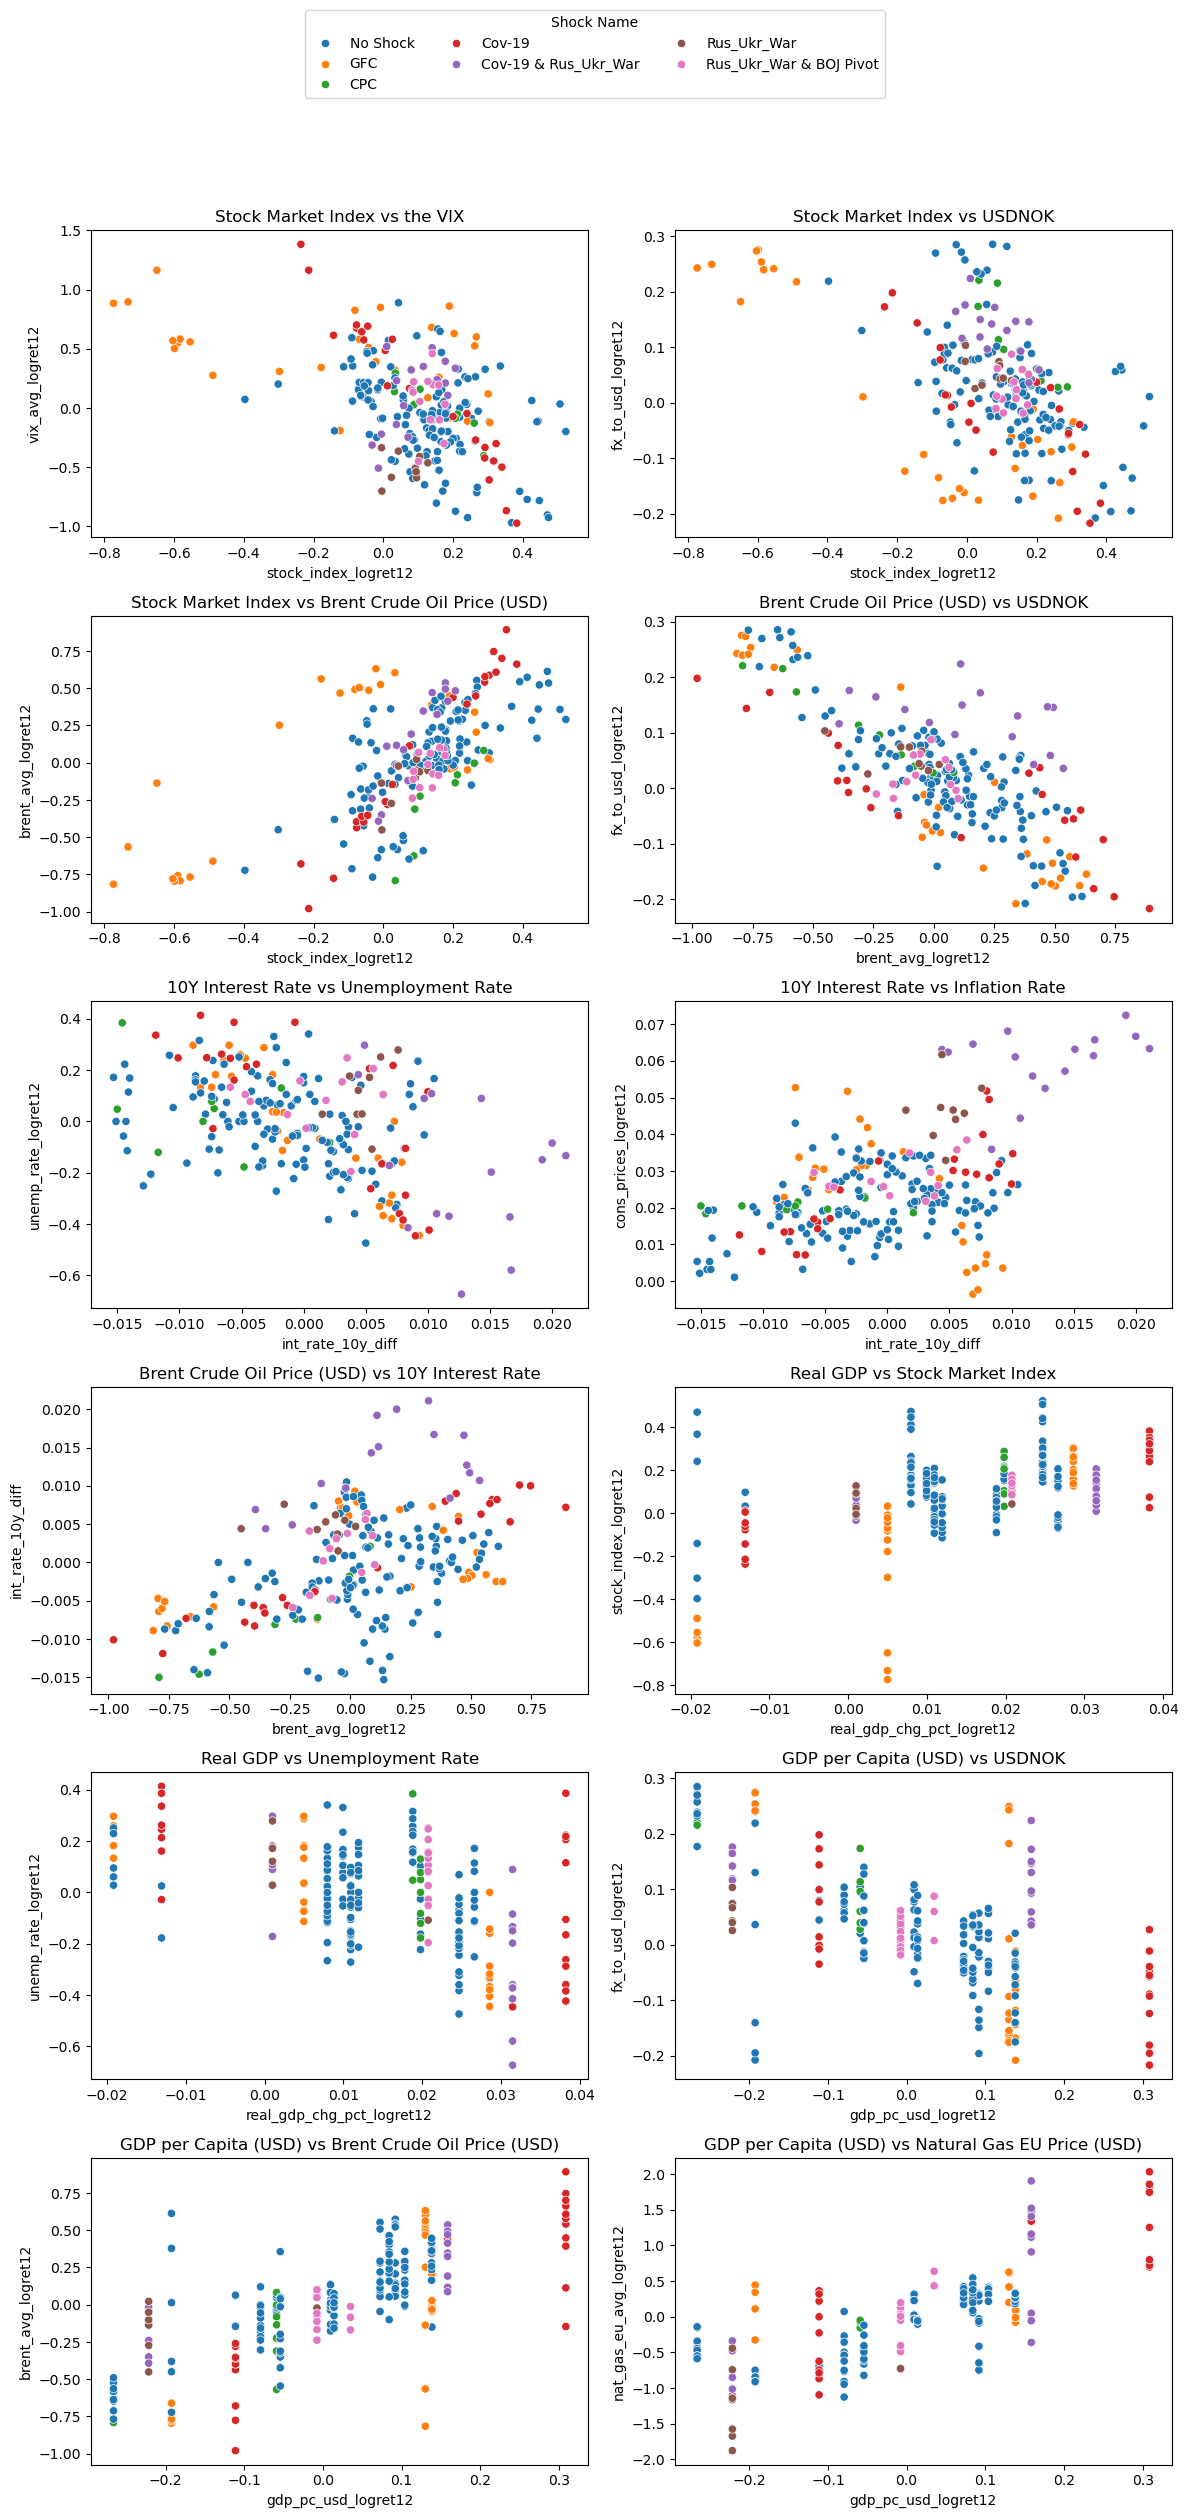

In [75]:
# Create a 6 x 2 grid of subplots
fig, axes = plt.subplots(6, 2, figsize=(12, 24))
plot_kwargs = dict(data=sub_norway_1_copy, hue='shock_name', legend=False)

# Create scatterplots without individual legends
sns.scatterplot(x='stock_index_logret12', y='vix_avg_logret12', ax=axes[0, 0], **plot_kwargs)
axes[0, 0].set_title('Stock Market Index vs the VIX')

sns.scatterplot(x='stock_index_logret12', y='fx_to_usd_logret12', ax=axes[0, 1], **plot_kwargs)
axes[0, 1].set_title('Stock Market Index vs USDNOK')

sns.scatterplot(x='stock_index_logret12', y='brent_avg_logret12', ax=axes[1, 0], **plot_kwargs)
axes[1, 0].set_title('Stock Market Index vs Brent Crude Oil Price (USD)')

sns.scatterplot(x='brent_avg_logret12', y='fx_to_usd_logret12', ax=axes[1, 1], **plot_kwargs)
axes[1, 1].set_title('Brent Crude Oil Price (USD) vs USDNOK')

sns.scatterplot(x='int_rate_10y_diff', y='unemp_rate_logret12', ax=axes[2, 0], **plot_kwargs)
axes[2, 0].set_title('10Y Interest Rate vs Unemployment Rate')

sns.scatterplot(x='int_rate_10y_diff', y='cons_prices_logret12', ax=axes[2, 1], **plot_kwargs)
axes[2, 1].set_title('10Y Interest Rate vs Inflation Rate')

sns.scatterplot(x='brent_avg_logret12', y='int_rate_10y_diff', ax=axes[3, 0], **plot_kwargs)
axes[3, 0].set_title('Brent Crude Oil Price (USD) vs 10Y Interest Rate')

sns.scatterplot(x='real_gdp_chg_pct_logret12', y='stock_index_logret12', ax=axes[3, 1], **plot_kwargs)
axes[3, 1].set_title('Real GDP vs Stock Market Index')

sns.scatterplot(x='real_gdp_chg_pct_logret12', y='unemp_rate_logret12', ax=axes[4, 0], **plot_kwargs)
axes[4, 0].set_title('Real GDP vs Unemployment Rate')

sns.scatterplot(x='gdp_pc_usd_logret12', y='fx_to_usd_logret12', ax=axes[4, 1], **plot_kwargs)
axes[4, 1].set_title('GDP per Capita (USD) vs USDNOK')

sns.scatterplot(x='gdp_pc_usd_logret12', y='brent_avg_logret12', ax=axes[5, 0], **plot_kwargs)
axes[5, 0].set_title('GDP per Capita (USD) vs Brent Crude Oil Price (USD)')

sns.scatterplot(x='gdp_pc_usd_logret12', y='nat_gas_eu_avg_logret12', ax=axes[5, 1], **plot_kwargs)
axes[5, 1].set_title('GDP per Capita (USD) vs Natural Gas EU Price (USD)')

# Create a dummy plot to extract legend handles and labels
dummy_fig, dummy_ax = plt.subplots()
dummy_plot = sns.scatterplot(x='stock_index_logret12', y='vix_avg_logret12', hue='shock_name', data=sub_norway_1_copy, ax=dummy_ax)
handles, labels = dummy_ax.get_legend_handles_labels()
plt.close(dummy_fig)  # Close dummy plot so it doesn't show

# Add single legend to the full grid
fig.legend(handles, labels, title='Shock Name', loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)

plt.tight_layout(rect=[0, 0, 1, 0.97])

# Save figure as a high-resolution image
path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'
fig.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'norway_scat_pre_stat.png'), dpi=300, bbox_inches='tight')

plt.show()

#### Norway has some scatterplots with clear shock-related outliers (e.g., for the stock market index pairs; and 10Y interest rate vs inflation rate). Others, such as 10Y interest rate vs unemployment rate have wide variance for shock and normal periods, and the correlation pattern is more ambiguous. The cleanest, tightest linear relationship with less variance appears to be Brent crude oil price (USD) vs USDNOK (Norwegian Krone amount per 1 USD), through shock and normal periods alike. A bit remarkable considering the wild gyrations in crude oil pricing over the last two (2) decades.

#### Run the shockstack_grid function on the individual variables used in the scatterplot grid with categorical variable overlay (above), to review the stacked bar histograms grid visualization output, in particular the outlier data values.

✅ Saved to: C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis\Analysis\Visualizations\norway_hist_pre_stat.png


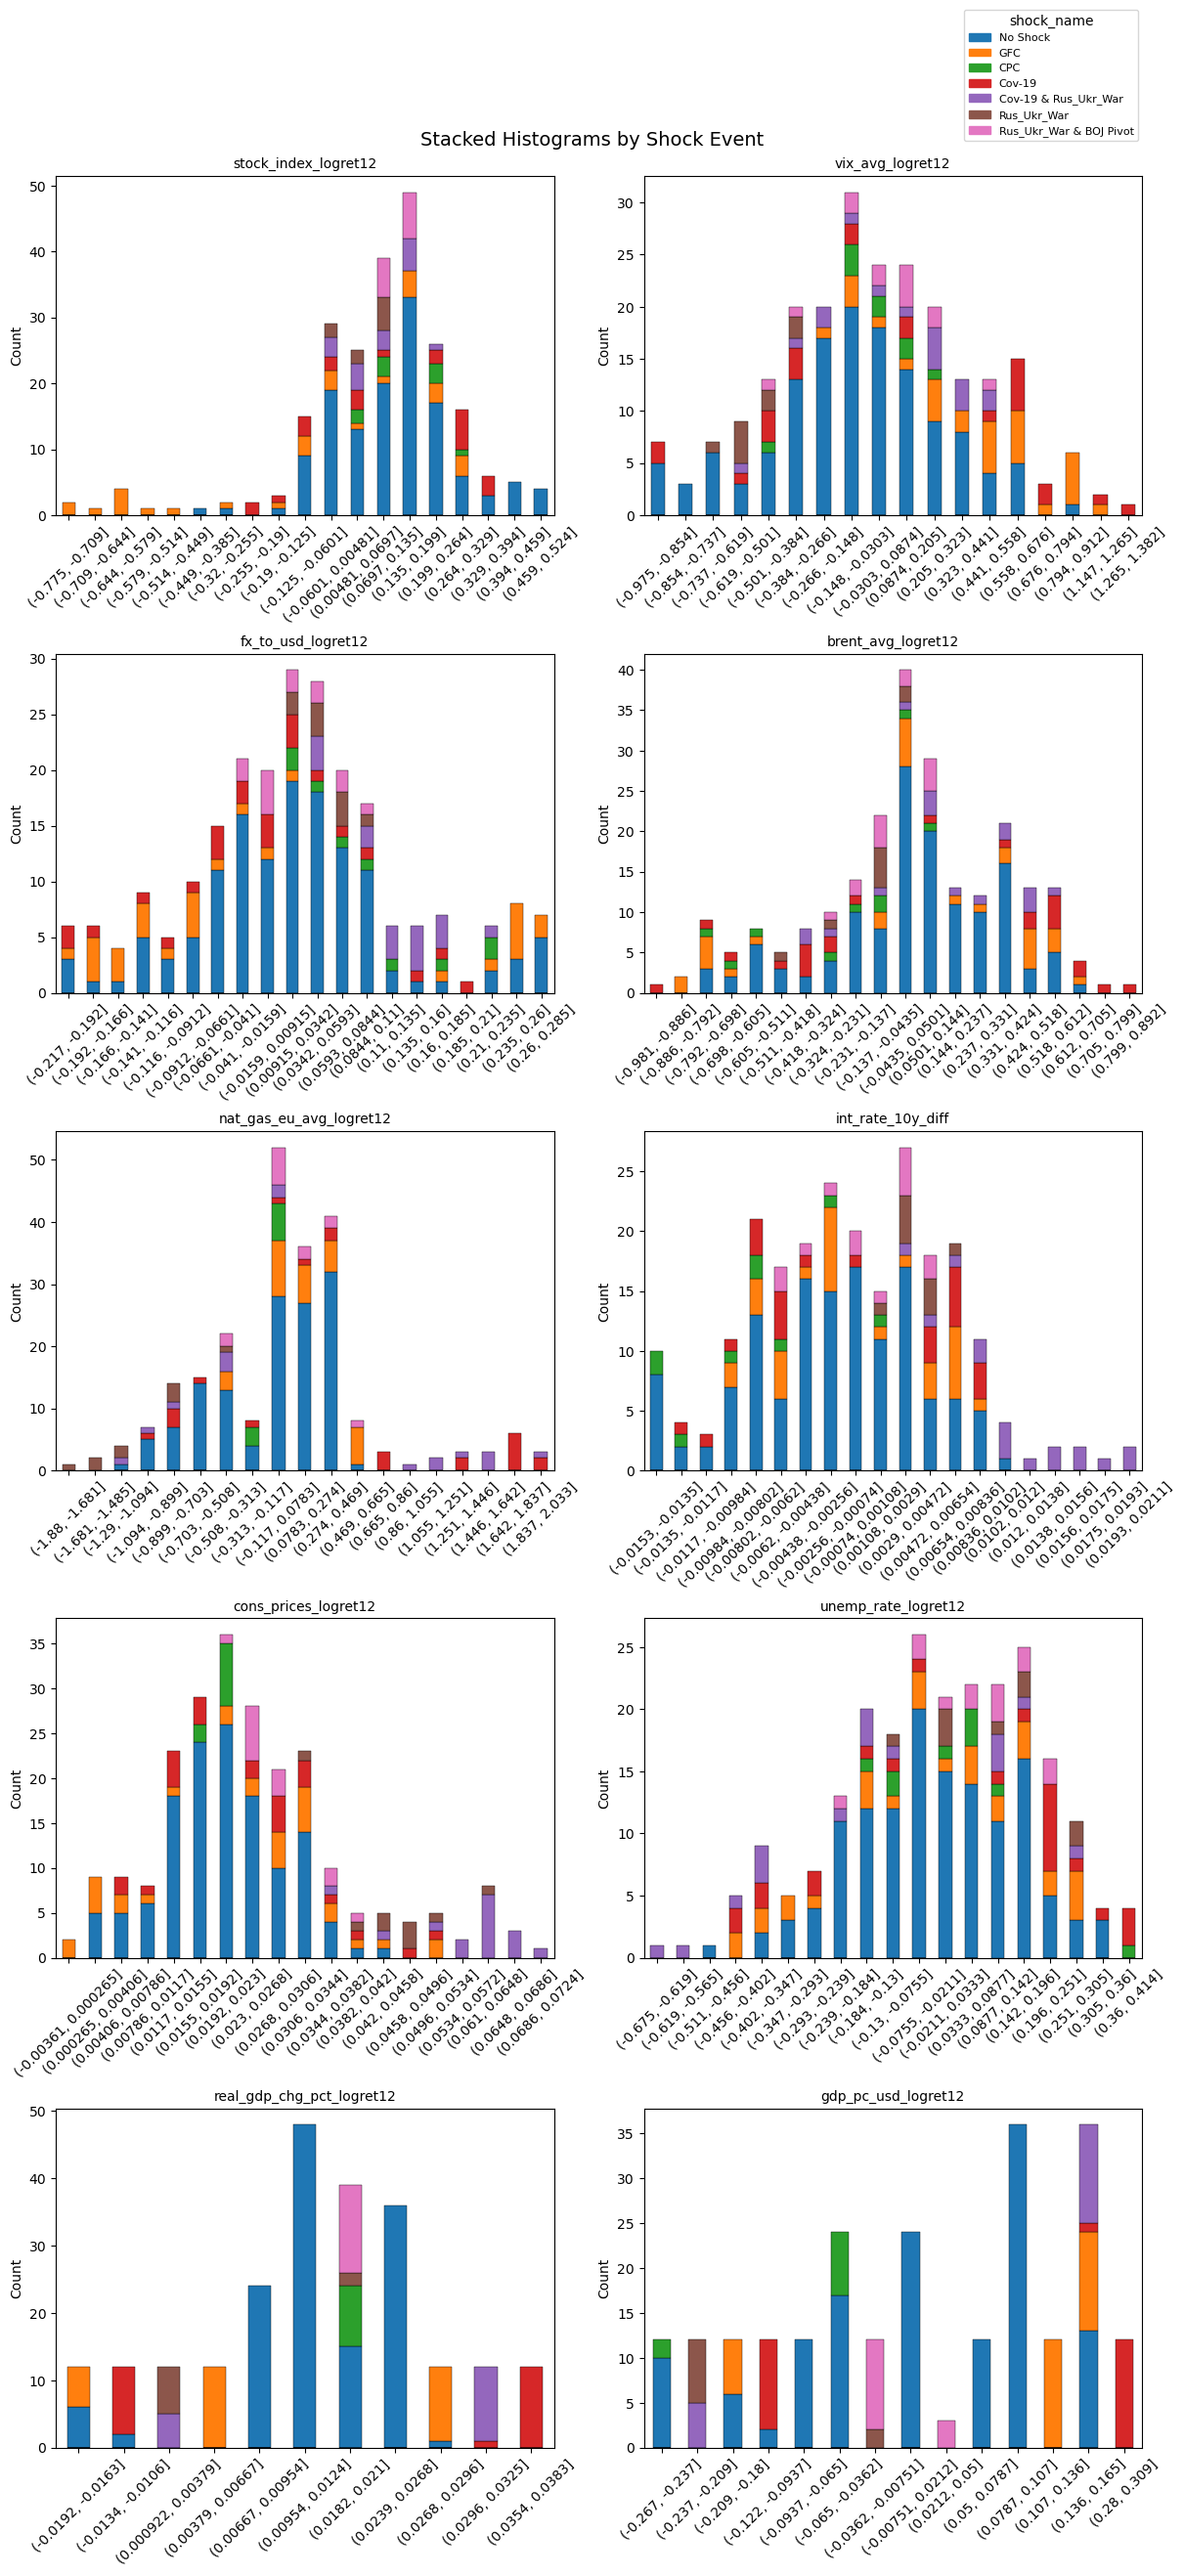

In [82]:
norway_scat_vars = ['stock_index_logret12', 'vix_avg_logret12', 'fx_to_usd_logret12', 'brent_avg_logret12', 'nat_gas_eu_avg_logret12', \
                    'int_rate_10y_diff','cons_prices_logret12','unemp_rate_logret12', 'real_gdp_chg_pct_logret12', 'gdp_pc_usd_logret12']

shockstack_grid(df=sub_norway_1_copy, vars_to_plot=norway_scat_vars, hue='shock_name', bins=20, cols=2, save=True, filename='norway_hist_pre_stat',\
                output_dir=r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis\Analysis\Visualizations')

#### Most Norway-specific variables showed mean reversion-type swings along the histogram x-axis during some shock periods, as the same variables did for the other countries examined so far. Separately, the inflation rate ('cons_prices') right-skewed frequency distribution showed heavy right tail impact from the Covid-19/Russia-Ukraine War, and the Russia-Ukraine War (solo, before overlapping with the BOJ Interest Rate Pivot).

In [87]:
# Export the Norway subset dataframe that was modified for use in categorical plots
path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'
sub_norway_1_copy.to_pickle(os.path.join(path, 'Data','Prepared Data', 'norway_cat_pre_stat.pkl'))